<a href="https://colab.research.google.com/github/wizard339/education/blob/main/svc_sklearn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset MNIST: картинки с рукописными цифрами.

x: 70_000 картинок размера 28x28.

y: 70_000 значений, какая цифра на картинке (0-9).

Обучаемся на 60_000 примерах, в результате можем распознать, какая цифра изображена на картинке, в т.ч. для тех 10_000 картинок, которые не входили в обучающую выборку.

Реализация на SVM.

In [1]:
# sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# В этом примере используем tensorflow только для удобного скачивания данных.
import tensorflow as tf

In [3]:
# Для красивого вывода результатов.
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib - "magic function" IPython shell, которая задаёт вывод matplotlib.
%matplotlib inline

In [4]:
# Будут нужны различные вспомогательные методы из numpy.
import numpy as np

In [5]:
# Скачиваем датасет MNIST с картинками цифр, написанных от руки.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Посмотрим на обучающую и тестовую выборку.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])
print(y_test[:10])

# Стоит убедиться, что совпадают размеры массивов входных картинок и их правильных ответов.
# И "fail fast", если это не так. Не обучать классификатор на кривых данных.
assert x_train.shape[0] == y_train.shape[0], f"В обучающей выборке размер массива входных картинок ({x_train.shape[0]}) и их правильных ответов ({y_train.shape[0]}) не совпадает."
assert x_test.shape[0] == y_test.shape[0], f"В обучающей выборке размер массива входных картинок ({x_test.shape[0]}) и их правильных ответов ({y_test.shape[0]}) не совпадает."


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 1 9 2 1 3 1 4]
[7 2 1 0 4 1 4 9 5 9]


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

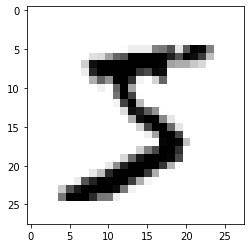

In [7]:
# В каком виде элемент.
print(x_train[0])
plt.imshow(x_train[0], cmap='gray_r')

In [8]:
x_train_flat = x_train.reshape(-1, 28*28)
print(x_train_flat.shape)

x_test_flat = x_test.reshape(-1, 28*28)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


In [9]:
# SVM классификатор.
svc = SVC()

In [10]:
# Обучаем SVM классификатор.
svc = svc.fit(x_train_flat, y_train)

In [11]:
y_pred = svc.predict(x_test_flat)

(10000,)
[7 2 1 0 4 1 4 9 6 9]


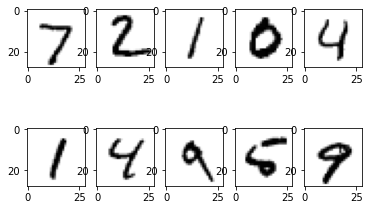

In [12]:
print(y_pred.shape)
print(y_pred[:10])

fig = plt.figure()

for i in range(10):
    im_idx = np.argwhere(y_pred == i)[0]
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(x_test[i], cmap='gray_r')

In [13]:
# Confusion matrix.
confusion_matrix_arr = confusion_matrix(y_test, y_pred)

In [14]:
# Напечатаем confusion matrix.
print(confusion_matrix_arr)

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


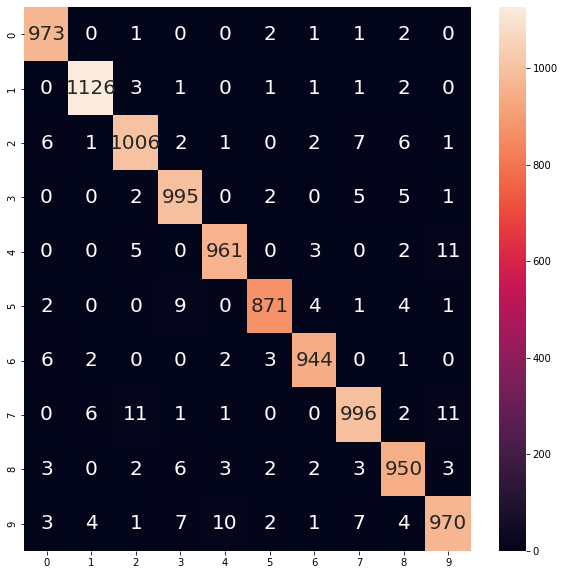

In [15]:
# Напечатаем confusion matrix красиво. =)
# Сделаем из Python массива Pandas DataFrame.
confusion_matrix_df = pd.DataFrame(confusion_matrix_arr)
# Размер картинки.
fig, ax = plt.subplots(figsize=(10,10))
# Seaborn Heatmap
sn.heatmap(confusion_matrix_df, annot=True, fmt='d', ax=ax, annot_kws={"size": 20}) # Размер шрифта.

plt.show()

In [16]:
# Метрики качества классификации: precision recall f1-score support.
clf_rep = classification_report(y_test, y_pred)

In [17]:
print(clf_rep)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Домашнее задание:

1. Добавить оценку вероятностей.
```
# Включить оценку вероятностей. (Необходимо сделать до обучения классификатора.)
SVC(probability=True)
# Оценка вероятностей.
svc.predict_proba(x_test_flat)
```
В качестве проверки можно убедиться, что в сумме вероятности дают единицу.

2. Поэкспериментировать с параметрами SVC: C, gamma, kernel.
* Посмотреть, как влияет на confusion_matrix.
* Посмотреть, как влияет на метрики классификации.
